# Match Analysis

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [69]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [70]:
matches.shape

(756, 14)

In [71]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only KKR VS CSK matches

In [72]:
KC= matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Chennai Super Kings'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Chennai Super Kings'))]

In [73]:
KC.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk"
103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens
166,2009,Centurion,2009-05-18,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge,SuperSport Park
182,2010,Kolkata,2010-03-16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens
222,2010,Chennai,2010-04-13,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,R Ashwin,"MA Chidambaram Stadium, Chepauk"


In [74]:
KC.shape

(20, 14)

In [75]:
KC.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [76]:
KC.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [77]:
KC.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,20.0,6.0,14.093672,0.0,0.0,0.0,2.25,55.0
win_by_wickets,20.0,4.1,3.354494,0.0,0.0,5.0,7.00,9.0


## HEAD TO HEAD

Text(0.5, 1.0, 'KKR VS CSK-head to head')

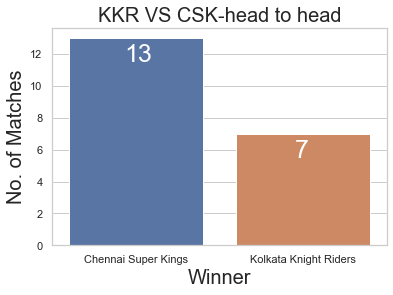

In [78]:
sns.countplot(KC["winner"])
plt.text(-0.07,11.5,str(KC['winner'].value_counts()['Chennai Super Kings']),size=25,color='white')
plt.text(0.95,5.5,str(KC['winner'].value_counts()['Kolkata Knight Riders']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('KKR VS CSK-head to head',fontsize = 20)

In [79]:
Season_wise_Match_Winner = pd.DataFrame(KC.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KKR VS CSK :")
Season_wise_Match_Winner

Season wise winner of matches between KKR VS CSK :


winner count
season winner                             
2008   Chennai Super Kings               2
2009   Kolkata Knight Riders             1
2010   Chennai Super Kings               2
2011   Chennai Super Kings               1
       Kolkata Knight Riders             1
2012   Chennai Super Kings               1
       Kolkata Knight Riders             2
2013   Chennai Super Kings               2
2014   Chennai Super Kings               1
       Kolkata Knight Riders             1
2015   Chennai Super Kings               1
       Kolkata Knight Riders             1
2018   Chennai Super Kings               1
       Kolkata Knight Riders             1
2019   Chennai Super Kings               2

### Winning Percentage

In [80]:
Winning_Percentage = KC['winner'].value_counts()/len(KC['winner'])

In [81]:
print("CSK winning percentage against KKR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KKR winning percentage against CSK(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

CSK winning percentage against KKR(overall) : 65%
KKR winning percentage against CSK(overall) : 35%


## Performance Analysis

In [82]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [83]:
performance("Kolkata Knight Riders",KC)

Number of times given team win while defending : 1
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  10.0
Average wickets by which a given team wins while chasing :  6.0


In [84]:
performance("Chennai Super Kings",KC)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  18.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [85]:
Toss_Decision = pd.DataFrame(KC.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner           toss_decision               
Chennai Super Kings   bat                        7
                      field                      4
Kolkata Knight Riders bat                        4
                      field                      5

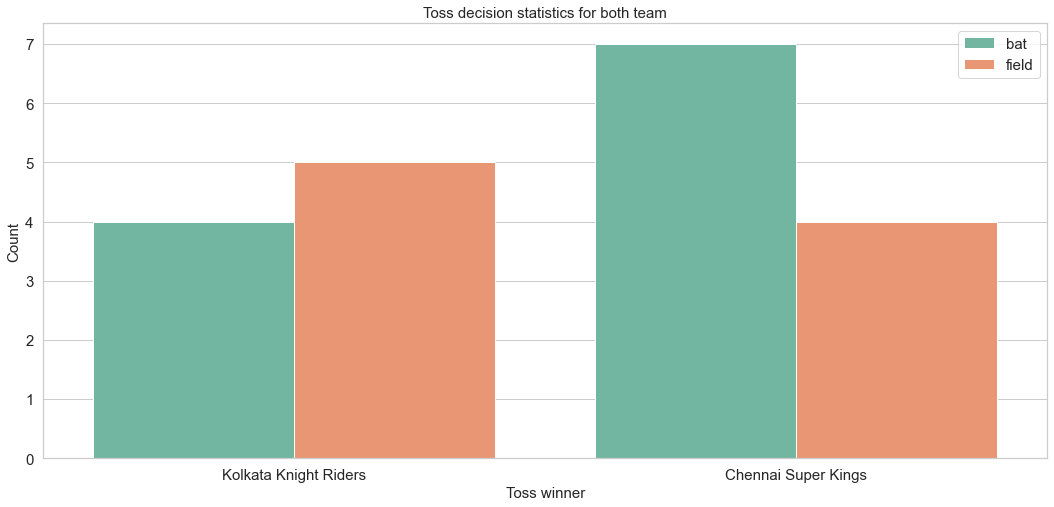

In [86]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KC['toss_winner'],palette='Set2',hue=KC['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [87]:
Toss_Decision_based_Winner = pd.DataFrame(KC.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner           toss_decision winner                       
Chennai Super Kings   bat           Chennai Super Kings         3
                                    Kolkata Knight Riders       4
                      field         Chennai Super Kings         4
Kolkata Knight Riders bat           Chennai Super Kings         4
                      field         Chennai Super Kings         2
                                    Kolkata Knight Riders       3

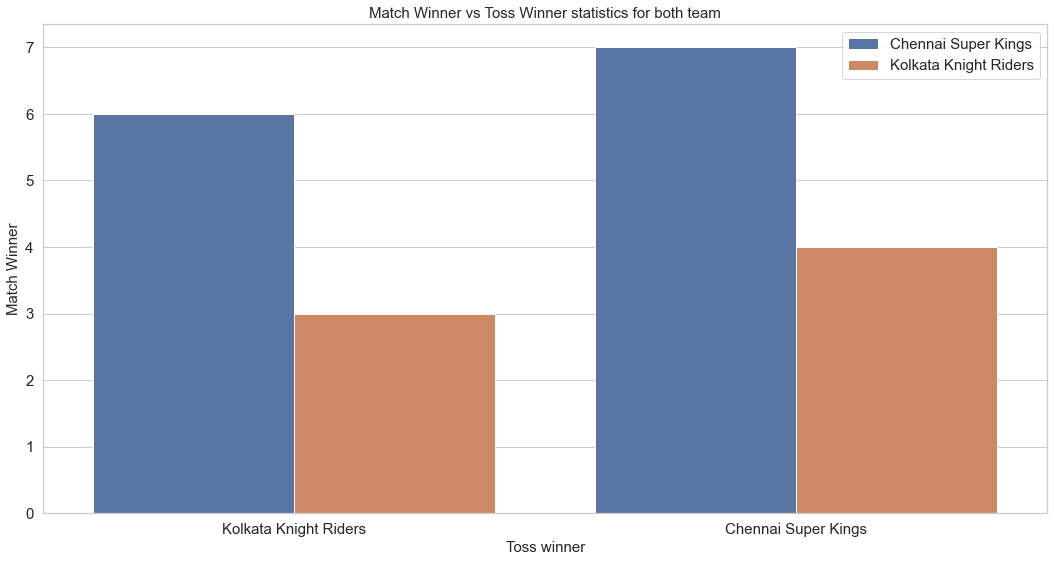

In [88]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KC['toss_winner'],hue=KC['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [89]:
KKR = KC[KC["toss_winner"]=="Kolkata Knight Riders"]
CSK = KC[KC["toss_winner"]=="Chennai Super Kings"]

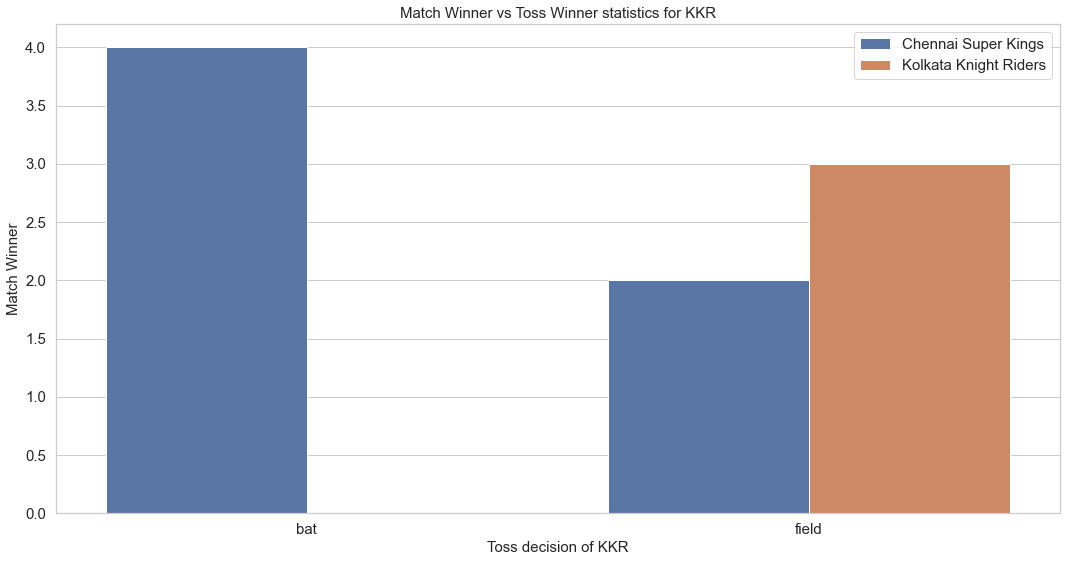

In [90]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KKR['toss_decision'],hue=KKR['winner'])
plt.title('Match Winner vs Toss Winner statistics for KKR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KKR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

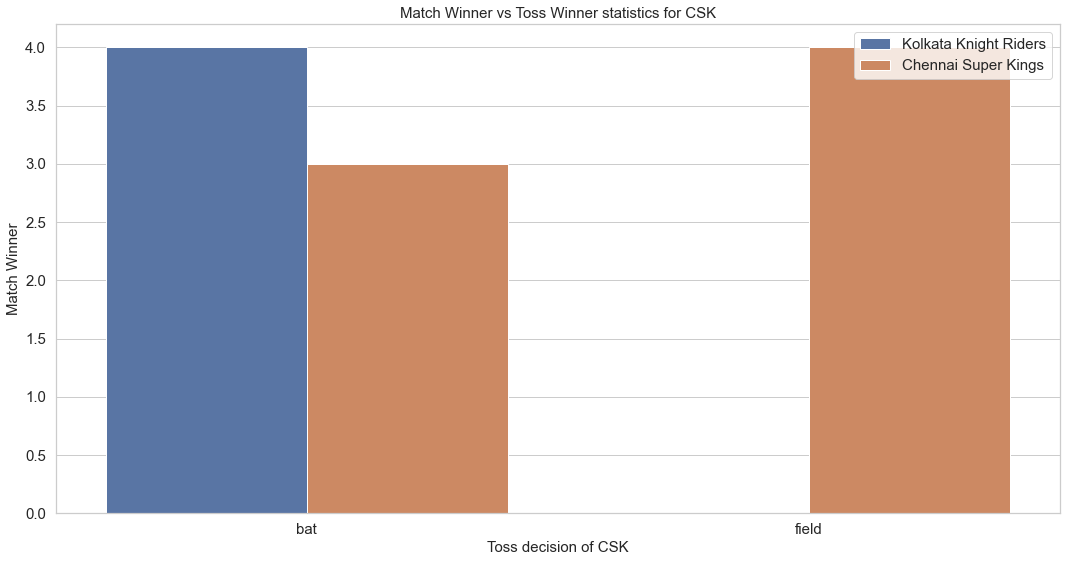

In [91]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CSK['toss_decision'],hue=CSK['winner'])
plt.title('Match Winner vs Toss Winner statistics for CSK',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of CSK',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [92]:
player_of_the_match = pd.DataFrame(KC.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
MEK Hussey,2
RA Jadeja,2
JDP Oram,1
Imran Tahir,1
SP Narine,1
M Ntini,1
MS Dhoni,1
BJ Hodge,1
Iqbal Abdulla,1
SW Billings,1


## Recent Year Performance Analysis

In [93]:
cond2 = KC["season"] == 2018
cond3 = KC["season"] == 2019
final = KC[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk"
7926,2018,Kolkata,03/05/18,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens
11314,2019,Chennai,09/04/19,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,DL Chahar,M. A. Chidambaram Stadium
11320,2019,Kolkata,14/04/19,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,Imran Tahir,Eden Gardens


In [94]:
final.shape

(4, 14)

In [95]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
Imran Tahir,1
SP Narine,1
SW Billings,1
DL Chahar,1


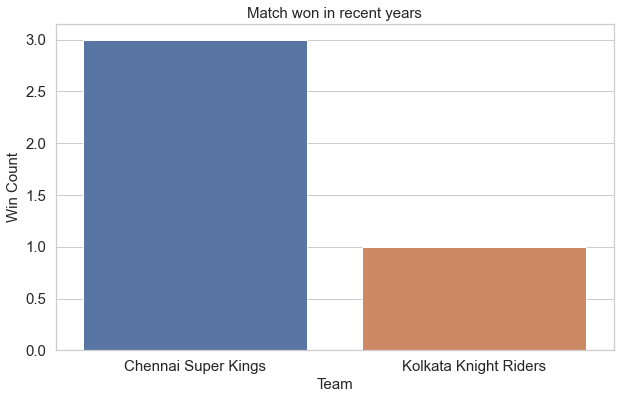

In [96]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head , Toss analysis, Performance Analysis, Recent year analysis etc we can predict that chasing side has better chances of winning the match and CSK will be favorite for this match considering their past performance against KKR.

But also considering the fact that both teams have good records against each other while chasing the score. 

We can predict that the team chasing the score has better chances to win this match.